In [2]:
import pandas as pd 
import numpy as np
pd.set_option('display.max_columns',None)

In [6]:
data = pd.read_csv(r'C:\Users\Administrator\Datas\门店数据\曝光-1-5相关性\1-2.csv',encoding= 'gbk')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371 entries, 0 to 370
Data columns (total 47 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   开始日期             371 non-null    int64  
 1   结束日期             371 non-null    int64  
 2   商家ID             371 non-null    int64  
 3   商家名称             371 non-null    object 
 4   运营组              371 non-null    object 
 5   省份               371 non-null    object 
 6   城市               371 non-null    object 
 7   是否新增商家           371 non-null    object 
 8   首次上线日期           371 non-null    int64  
 9   门店在线状态           371 non-null    object 
 10  （日均）预设营业时长（h）    371 non-null    float64
 11  （日均）在线营业时长（h）    371 non-null    float64
 12  曝光人数             371 non-null    int64  
 13  入店人数             371 non-null    int64  
 14  下单人数             371 non-null    int64  
 15  下单新客人数           371 non-null    int64  
 16  入店转化率            371 non-null    float64
 17  下单转化率           

In [7]:
data_manjian = data[['开始日期','商家ID','原价交易额','实付交易额','有效订单数','商家补贴金额']]

In [8]:
data_manjian['平均原价'] = data_manjian['原价交易额']/data_manjian['有效订单数']

e:\python\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [9]:
data_manjian['平均实付'] = data_manjian['实付交易额']/data_manjian['有效订单数']

e:\python\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [10]:
data_manjian

,开始日期,商家ID,原价交易额,实付交易额,有效订单数,商家补贴金额,平均原价,平均实付
0,20200201,295680,320.0,146.0,1,213.0,320.000000,146.000000
1,20200201,642989,1529.0,654.0,7,1143.0,218.428571,93.428571
2,20200201,653643,1793.0,1193.0,4,756.0,448.250000,298.250000
3,20200201,714142,4712.0,3370.0,13,2094.0,362.461538,259.230769
4,20200201,772683,0.0,0.0,0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...
366,20200201,8488488,0.0,0.0,0,0.0,NaN,NaN
367,20200201,8488489,2019.0,828.0,8,1464.0,252.375000,103.500000
368,20200201,8488490,2904.0,1888.0,12,1250.0,242.000000,157.333333
369,20200201,8492059,0.0,0.0,0,0.0,NaN,NaN


In [11]:
data_manjian['转化率'] = data_manjian['平均实付']/data_manjian['平均原价']

e:\python\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [12]:
data_manjian = data_manjian.fillna(0)

In [13]:
data_manjian

,开始日期,商家ID,原价交易额,实付交易额,有效订单数,商家补贴金额,平均原价,平均实付,转化率
0,20200201,295680,320.0,146.0,1,213.0,320.000000,146.000000,0.456250
1,20200201,642989,1529.0,654.0,7,1143.0,218.428571,93.428571,0.427731
2,20200201,653643,1793.0,1193.0,4,756.0,448.250000,298.250000,0.665365
3,20200201,714142,4712.0,3370.0,13,2094.0,362.461538,259.230769,0.715195
4,20200201,772683,0.0,0.0,0,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
366,20200201,8488488,0.0,0.0,0,0.0,0.000000,0.000000,0.000000
367,20200201,8488489,2019.0,828.0,8,1464.0,252.375000,103.500000,0.410104
368,20200201,8488490,2904.0,1888.0,12,1250.0,242.000000,157.333333,0.650138
369,20200201,8492059,0.0,0.0,0,0.0,0.000000,0.000000,0.000000


In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

e:\python\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 36716 missing from current font.
  font.set_text(s, 0.0, flags=flags)
e:\python\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 21270 missing from current font.
  font.set_text(s, 0.0, flags=flags)
e:\python\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 29575 missing from current font.
  font.set_text(s, 0.0, flags=flags)
e:\python\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 26377 missing from current font.
  font.set_text(s, 0.0, flags=flags)
e:\python\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 25928 missing from current font.
  font.set_text(s, 0.0, flags=flags)
e:\python\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 35746 missing from current font.
  font.set_text(s, 0.0, flags=flags)
e:\python\lib\site-packages\matplotlib\b

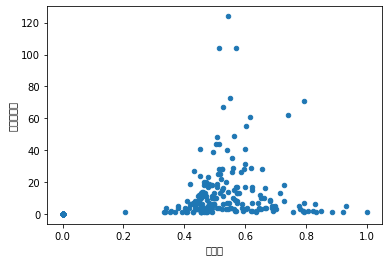

In [15]:
data_manjian.plot.scatter(x='转化率', y='有效订单数')

e:\python\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 24179 missing from current font.
  font.set_text(s, 0.0, flags=flags)
e:\python\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 22343 missing from current font.
  font.set_text(s, 0.0, flags=flags)
e:\python\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 24179 missing from current font.
  font.set_text(s, 0, flags=flags)
e:\python\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 22343 missing from current font.
  font.set_text(s, 0, flags=flags)


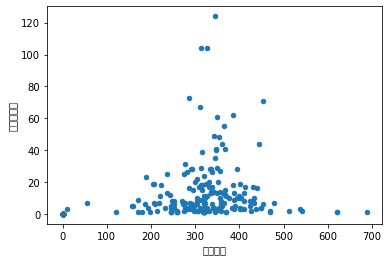

In [22]:
data_manjian.plot.scatter(x='平均原价', y='有效订单数')

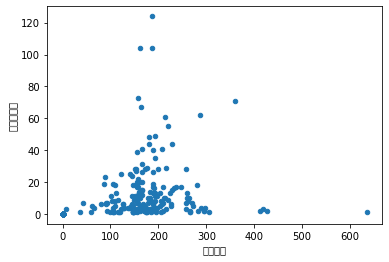

In [23]:
data_manjian.plot.scatter(x='平均实付', y='有效订单数')

In [16]:
data_manjian_helf = data_manjian[data_manjian['转化率']<= 0.4]
data_manjian_helf = data_manjian_helf.sort_values('转化率',ascending = False)
data_manjian_helf

,开始日期,商家ID,原价交易额,实付交易额,有效订单数,商家补贴金额,平均原价,平均实付,转化率
277,20200201,8068587,470.0,185.0,1,324.0,470.0,185.00,0.393617
66,20200201,5762294,1106.0,421.0,4,841.0,276.5,105.25,0.380651
27,20200201,2922099,800.0,303.0,5,692.0,160.0,60.60,0.378750
309,20200201,8278268,320.0,118.0,1,202.0,320.0,118.00,0.368750
303,20200201,8258611,517.0,185.0,2,371.0,258.5,92.50,0.357834
...,...,...,...,...,...,...,...,...,...
145,20200201,7160078,0.0,0.0,0,0.0,0.0,0.00,0.000000
146,20200201,7166109,0.0,0.0,0,0.0,0.0,0.00,0.000000
147,20200201,7166110,0.0,0.0,0,0.0,0.0,0.00,0.000000
148,20200201,7166112,0.0,0.0,0,0.0,0.0,0.00,0.000000


In [17]:
data_manjian_helf_drop =data_manjian_helf.drop(data_manjian_helf[data_manjian_helf.原价交易额 < 1].index)

In [18]:
data_manjian_helf_drop = data_manjian_helf_drop.sort_values('有效订单数',ascending = False)

In [19]:
data_manjian_helf_drop

,开始日期,商家ID,原价交易额,实付交易额,有效订单数,商家补贴金额,平均原价,平均实付,转化率
27,20200201,2922099,800.0,303.0,5,692.0,160.0,60.60,0.378750
66,20200201,5762294,1106.0,421.0,4,841.0,276.5,105.25,0.380651
330,20200201,8357592,776.0,264.0,4,590.0,194.0,66.00,0.340206
303,20200201,8258611,517.0,185.0,2,371.0,258.5,92.50,0.357834
277,20200201,8068587,470.0,185.0,1,324.0,470.0,185.00,0.393617
309,20200201,8278268,320.0,118.0,1,202.0,320.0,118.00,0.368750
335,20200201,8364416,170.0,60.0,1,144.0,170.0,60.00,0.352941
285,20200201,8207108,320.0,108.0,1,251.0,320.0,108.00,0.337500
242,20200201,7672370,345.0,115.0,1,269.0,345.0,115.00,0.333333
119,20200201,6865867,180.0,37.0,1,143.0,180.0,37.00,0.205556
